# Objective : -- > This is a usecase where we need  to predict the doctor’s consulting fee.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
doc_train_df=pd.read_excel('Final_Train.xlsx')
doc_test_df=pd.read_excel('Final_Test.xlsx')

In [3]:
#for differentiating between test and train data
doc_train_df["source"] = "train"
doc_test_df["source"] = "test"

In [4]:
y_test=pd.read_excel('Sample_submission.xlsx')

In [5]:
doc_df=pd.concat([doc_train_df, doc_test_df])

In [6]:
#finding if the dataset contains duplicate values
doc_df.duplicated().sum()

51

In [7]:
#dropping the duplicates
doc_df=doc_df.drop_duplicates()

# Finding insights of the data and what it consist of

In [8]:
doc_df.head()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [9]:
doc_df.tail()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source
1982,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
1985,BDS,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500",NaN,test


In [10]:
doc_df.shape

(7897, 8)

In [11]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Qualification        7897 non-null   object 
 1   Experience in years  7897 non-null   int64  
 2   Rating               3556 non-null   object 
 3   Place                7894 non-null   object 
 4   Profile              7897 non-null   object 
 5   Miscellaneous_Info   4493 non-null   object 
 6   Fees                 5921 non-null   float64
 7   source               7897 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 555.3+ KB


In [12]:
#finding different Qualifications presnet in the dataset and their count
print(doc_df['Qualification'].unique())
print("\n")
print(doc_df['Qualification'].value_counts())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine'
 'MBBS, MS - General Surgery, FAIS, FIAGES'
 'MBBS, MD / MS - Obstetrics & Gynaecology']


BDS                                                                                                                                                                     626
BHMS                                                                                                                                                                    622
BAMS                                                                                                                                                                    620
MBBS                                                                                                                                                                    438
MBBS, MS - ENT                   

In [13]:
#finding different Ratings presnet in the dataset and their count
print(doc_df['Rating'].unique())
print("\n")
print(doc_df['Rating'].value_counts())

['100%' '98%' nan '99%' '79%' '95%' '97%' '94%' '88%' '90%' '80%' '93%'
 '36%' '78%' '87%' '96%' '82%' '89%' '74%' '86%' '92%' '83%' '76%' '85%'
 '56%' '91%' '68%' '60%' '75%' '69%' '73%' '67%' '77%' '33%' '55%' '71%'
 '84%' '45%' '63%' '72%' '81%' '62%' '57%' '7%' '48%' '40%' '70%' '64%'
 '65%' '47%' '58%' '53%' '52%']


100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
83%      32
82%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
79%      15
81%      15
76%      13
73%      13
60%      11
75%       8
70%       8
74%       7
78%       7
69%       6
68%       5
55%       5
56%       5
64%       4
57%       3
72%       3
65%       2
63%       2
33%       2
53%       2
62%       2
58%       1
52%       1
7%        1
47%       1
45%       1
36%       1
48%       1
40%       1
Name: Rating, dtype: int64


In [14]:
#finding different Place presnet in the dataset and their count
print(doc_df['Place'].unique())
print("\n")
print(doc_df['Place'].value_counts())

['Kakkanad, Ernakulam' 'Whitefield, Bangalore'
 'Mathikere - BEL, Bangalore' 'Bannerghatta Road, Bangalore'
 'Keelkattalai, Chennai' 'Porur, Chennai' 'Karol Bagh, Delhi'
 'Arekere, Bangalore' 'Old City, Hyderabad' 'Athani, Ernakulam'
 'Thousand Lights, Chennai' 'Somajiguda, Hyderabad'
 'Coimbatore Racecourse, Coimbatore' 'Jubilee Hills, Hyderabad'
 'Kondli, Delhi' 'Saroor Nagar, Hyderabad' 'Tambaram West, Chennai'
 'Purasawakkam, Chennai' 'KPHB, Hyderabad' 'HSR Layout, Bangalore'
 'Pollachi, Coimbatore' 'Vasundhra Enclave, Delhi' 'Chembur, Mumbai'
 'Thammanam, Ernakulam' 'Andheri, Mumbai' 'Pattom, Thiruvananthapuram'
 'Kukatpally, Hyderabad' 'Vadavalli, Coimbatore' 'Defence Colony, Delhi'
 'Banjara Hills, Hyderabad' 'Sion West, Mumbai' 'CR Park, Delhi'
 'Mogappair East, Chennai' 'IP Extension, Delhi'
 'Safdarjung Enclave, Delhi' 'New Friends Colony, Delhi'
 'Borivali West, Mumbai' 'Saket, Delhi' 'Malad, Mumbai'
 'Hyder Nagar, Hyderabad' 'Dahisar West, Mumbai' 'RT Nagar, Bangalore'
 'Po

In [15]:
#finding different Profile presnet in the dataset and their count
print(doc_df['Profile'].unique())
print("\n")
print(doc_df['Profile'].value_counts())

['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


Dentist             1832
General Medicine    1613
Dermatologists      1345
Homeopath           1114
Ayurveda            1031
ENT Specialist       962
Name: Profile, dtype: int64


In [16]:
#finding different Miscellaneous_Information presnet in the dataset and their count
print(doc_df['Miscellaneous_Info'].unique())
print("\n")
print(doc_df['Miscellaneous_Info'].value_counts())

['100% 16 Feedback Kakkanad, Ernakulam'
 '98% 76 Feedback Whitefield, Bangalore' nan ...
 'General Dentistry Dental Fillings RCT - Single Sitting'
 '98% 240 Feedback Velachery, Chennai'
 'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment']


Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth     50
Skin Allergy Treatment Skin Allergies Dermabrasion                     18
Tooth Extraction Dental Fillings Scaling / Polishing                   16
Dental Fillings Zirconia Crowns Dental Implant Fixing                  15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                14
                                                                       ..
Mouth Guard Cosmetic/ Aesthetic Dentistry Smile Design                  1
Dental Implant Fixing Cosmetic/ Aesthetic Dentistry Teeth Whitening     1
99% 16 Feedback Pappanaickenpalayam West, Coimbatore                    1
98% 154 Feedback HSR Layout, Bangalore                           

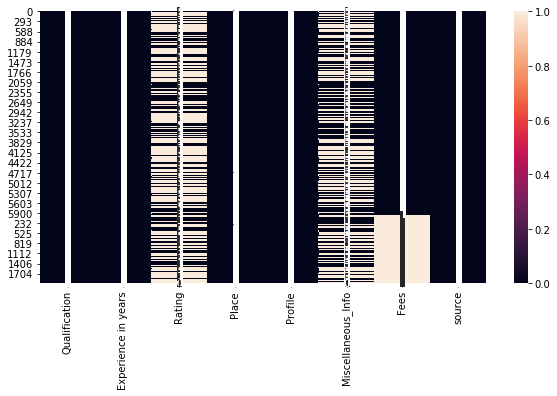

In [17]:
#checking null values
plt.figure(figsize=(10,5))
sns.heatmap(doc_df.isnull(),annot=True)

In [18]:
doc_df.isnull().sum()

Qualification             0
Experience in years       0
Rating                 4341
Place                     3
Profile                   0
Miscellaneous_Info     3404
Fees                   1976
source                    0
dtype: int64

In [19]:
#here first performing data_cleaning as it is not clear what the values in the dataset is conveying

In [20]:
import re

In [21]:
# Defining function Clear_Qual to remove inconsistence data
def Clear_Qual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [22]:
#Applying the function on the Qualification set
doc_df.Qualification =doc_df.Qualification.apply(lambda x: Clear_Qual(x))

In [23]:
#cleaning Qualification column by dividing qualification column into max qualification a doctor can posses
#findin maximum length of Qualification column
max_qual_length=-1
for i in range(len(doc_df["Qualification"])):
    temp=len(doc_df["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max qualification length is :{}".format(max_qual_length))


Max qualification length is :17


In [24]:
#creating 10 parts of qualification column as qualification-1, qualification and so on
qualification_1=list()
qualification_2=list()
qualification_3=list()
qualification_4=list()
qualification_5=list()
qualification_6=list()
qualification_7= list()
qualification_8=list()
qualification_9=list()
qualification_10=list()
qualification_11=list()
qualification_12=list()
qualification_13=list()
qualification_14=list()
qualification_15=list()
qualification_16=list()
qualification_17= list()



for i in range(len(doc_df["Qualification"])):
    temp=doc_df["Qualification"].iloc[i].split(",")
    try :
                qualification_1.append(temp[0].strip().upper())
    except :
                qualification_1.append('NONE')
    try :
                qualification_2.append(temp[1].strip().upper())
    except :
                qualification_2.append('NONE')
            
    try :
                qualification_3.append(temp[2].strip().upper())
    except :
                qualification_3.append('NONE')
            
    
    try :
                qualification_4.append(temp[3].strip().upper())
    except :
                qualification_4.append('NONE')
            
    try :
                qualification_5.append(temp[4].strip().upper())
    except :
                qualification_5.append('NONE')
                                       
                                       
    try :
                qualification_6.append(temp[5].strip().upper())
    except :
                qualification_6.append('NONE')     
                                       
    try :
                qualification_7.append(temp[6].strip().upper())
    except :
                qualification_7.append('NONE')
     
                                       
    try :
                qualification_8.append(temp[7].strip().upper())
    except :
                qualification_8.append('NONE')                                  
                                  
                                       
                                       
    try :
                qualification_9.append(temp[8].strip().upper())
    except :
                qualification_9.append('NONE')
                                       
                                       
                                       
                                       
    try :
                qualification_10.append(temp[9].strip().upper())
    except :
                qualification_10.append('NONE')                               
                                       
                                       
    try :
                qualification_11.append(temp[0].strip().upper())
    except :
                qualification_11.append('NONE')
    try :
                qualification_12.append(temp[1].strip().upper())
    except :
                qualification_12.append('NONE')
            
    try :
                qualification_13.append(temp[2].strip().upper())
    except :
                qualification_13.append('NONE')
            
    
    try :
                qualification_14.append(temp[3].strip().upper())
    except :
                qualification_14.append('NONE')
            
    try :
                qualification_15.append(temp[4].strip().upper())
    except :
                qualification_15.append('NONE')
                                       
                                       
    try :
                qualification_16.append(temp[5].strip().upper())
    except :
                qualification_16.append('NONE')     
                                       
    try :
                qualification_17.append(temp[6].strip().upper())
    except :
                qualification_17.append('NONE')
                                        
                                       
                                       
                                       
                                       
                                       

In [25]:
doc_df['qualification_1']=qualification_1
doc_df['qualification_2']=qualification_2
doc_df['qualification_3']=qualification_3
doc_df['qualification_4']=qualification_4
doc_df['qualification_5']=qualification_5
doc_df['qualification_6']=qualification_6
doc_df['qualification_7']=qualification_7
doc_df['qualification_8']=qualification_8
doc_df['qualification_9']=qualification_9
doc_df['qualification_10']=qualification_10
doc_df['qualification_11']=qualification_11
doc_df['qualification_12']=qualification_12
doc_df['qualification_13']=qualification_13
doc_df['qualification_14']=qualification_14
doc_df['qualification_15']=qualification_15
doc_df['qualification_16']=qualification_16
doc_df['qualification_17']=qualification_17

In [26]:
doc_df

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2,...,qualification_8,qualification_9,qualification_10,qualification_11,qualification_12,qualification_13,qualification_14,qualification_15,qualification_16,qualification_17
0,"bhms,md-homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY,...,NONE,NONE,NONE,BHMS,MD-HOMEOPATHY,NONE,NONE,NONE,NONE,NONE
1,"bams,md-ayurvedamedicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE,...,NONE,NONE,NONE,BAMS,MD-AYURVEDAMEDICINE,NONE,NONE,NONE,NONE,NONE
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY,...,NONE,NONE,NONE,MBBS,MS-OTORHINOLARYNGOLOGY,NONE,NONE,NONE,NONE,NONE
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY,...,NONE,NONE,NONE,BAMS,BSC-ZOOLOGY,NONE,NONE,NONE,NONE,NONE
4,bams,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE,...,NONE,NONE,NONE,BAMS,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test,BAMS,DOCTOROFMEDICINE,...,NONE,NONE,NONE,BAMS,DOCTOROFMEDICINE,NONE,NONE,NONE,NONE,NONE
1983,"mbbs,md-dermatology,venereology&leprosy",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test,MBBS,MD-DERMATOLOGY,...,NONE,NONE,NONE,MBBS,MD-DERMATOLOGY,VENEREOLOGY&LEPROSY,NONE,NONE,NONE,NONE
1984,"mbbs,md/ms-obstetrics&gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test,MBBS,MD/MS-OBSTETRICS&GYNAECOLOGY,...,NONE,NONE,NONE,MBBS,MD/MS-OBSTETRICS&GYNAECOLOGY,NONE,NONE,NONE,NONE,NONE
1985,bds,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test,BDS,NONE,...,NONE,NONE,NONE,BDS,NONE,NONE,NONE,NONE,NONE,NONE


In [27]:
#after qualification 2 rarely other qualification consist any data, therefore dropping the qulification_3,qulification_4,and so on
doc_df.drop(['qualification_3','qualification_4','qualification_5','qualification_6','qualification_7','qualification_8','qualification_9','qualification_10','qualification_11','qualification_12','qualification_13','qualification_14','qualification_15','qualification_16','qualification_17'],axis=1,inplace=True)

In [28]:
doc_df.head()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2
0,"bhms,md-homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY
1,"bams,md-ayurvedamedicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY
4,bams,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE


In [29]:
doc_df.drop(['Qualification'],axis=1,inplace=True)

In [30]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE


In [31]:
#cleaning Rating column and replacing nan values

doc_df['Rating'].fillna('0%',inplace =True) # -- Replacing nan values

#cleaning the Rating Column
doc_df['Rating']=doc_df['Rating'].str.strip("%")
doc_df['Rating']=doc_df['Rating'].astype(float)

In [32]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY
1,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE
2,9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY
3,12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY
4,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE


In [33]:
#Now clearing the place column and dividing it into patrs as maximum place column length 

In [34]:
#changing datatype of place column
doc_df["Place"]=doc_df["Place"].astype(str)

In [35]:
max_place_length=-1
for i in range(len(doc_df["Place"])):
    temp=len(doc_df["Place"].iloc[i].strip().upper().split(","))
    if temp>max_place_length:
        max_place_length=temp
print("Max qualification length is :{}".format(max_place_length))

Max qualification length is :3


In [36]:
place_1=list()
place_2=list()
place_3=list()

for i in range(len(doc_df["Place"])):
    temp=doc_df["Place"].iloc[i].split(",")
    try :
                place_1.append(temp[0].strip().upper())
    except :
                place_1.append('NONE')
            
    try :
                place_2.append(temp[1].strip().upper())
    except :
                place_2.append('NONE')
            
    try :
                place_3.append(temp[2].strip().upper())
    except :
                place_3.append('NONE')

In [37]:
doc_df['Place_1']=place_1
doc_df['Place_2']=place_2
doc_df['Place_3']=place_3

In [38]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2,Place_1,Place_2,Place_3
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM,NONE
1,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE,NONE
2,9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE,NONE
3,12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE,NONE
4,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE,KEELKATTALAI,CHENNAI,NONE


In [39]:
doc_df.drop(['Place'],axis=1,inplace=True)

In [40]:
doc_df

,Experience in years,Rating,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2,Place_1,Place_2,Place_3
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM,NONE
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE,NONE
2,9,0.0,ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE,NONE
3,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE,NONE
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE,KEELKATTALAI,CHENNAI,NONE
...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0.0,Ayurveda,NaN,NaN,test,BAMS,DOCTOROFMEDICINE,BASAVANAGUDI,BANGALORE,NONE
1983,4,0.0,Dermatologists,NaN,NaN,test,MBBS,MD-DERMATOLOGY,CHOOLAI,CHENNAI,NONE
1984,9,0.0,General Medicine,NaN,NaN,test,MBBS,MD/MS-OBSTETRICS&GYNAECOLOGY,PORUR,CHENNAI,NONE
1985,12,98.0,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test,BDS,NONE,AREKERE,BANGALORE,NONE


In [41]:
#we can see in the dataset that place_3 is have almost all none value
doc_df.drop(['Place_3'],axis=1,inplace=True)

In [42]:
doc_df.head()

,Experience in years,Rating,Profile,Miscellaneous_Info,Fees,source,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE
2,9,0.0,ENT Specialist,NaN,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE
3,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,BAMS,NONE,KEELKATTALAI,CHENNAI


In [43]:
#miscellaneous_info : miscellaneous is made up of an odd bunch of things — things you might not expect to go together
#therefore this information doctor donot want tto share therefore dropping 'miscellaneous_info' column

doc_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [44]:
doc_df.head()

,Experience in years,Rating,Profile,Fees,source,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,Homeopath,100.0,train,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM
1,12,98.0,Ayurveda,350.0,train,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE
2,9,0.0,ENT Specialist,300.0,train,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE
3,12,0.0,Ayurveda,250.0,train,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE
4,20,100.0,Ayurveda,250.0,train,BAMS,NONE,KEELKATTALAI,CHENNAI


In [45]:
#finding different Place_1 presnet in the dataset and their count
print(doc_df['Place_1'].unique())
print("\n")
print(doc_df['Place_1'].value_counts())

['KAKKANAD' 'WHITEFIELD' 'MATHIKERE - BEL' 'BANNERGHATTA ROAD'
 'KEELKATTALAI' 'PORUR' 'KAROL BAGH' 'AREKERE' 'OLD CITY' 'ATHANI'
 'THOUSAND LIGHTS' 'SOMAJIGUDA' 'COIMBATORE RACECOURSE' 'JUBILEE HILLS'
 'KONDLI' 'SAROOR NAGAR' 'TAMBARAM WEST' 'PURASAWAKKAM' 'KPHB'
 'HSR LAYOUT' 'POLLACHI' 'VASUNDHRA ENCLAVE' 'CHEMBUR' 'THAMMANAM'
 'ANDHERI' 'PATTOM' 'KUKATPALLY' 'VADAVALLI' 'DEFENCE COLONY'
 'BANJARA HILLS' 'SION WEST' 'CR PARK' 'MOGAPPAIR EAST' 'IP EXTENSION'
 'SAFDARJUNG ENCLAVE' 'NEW FRIENDS COLONY' 'BORIVALI WEST' 'SAKET' 'MALAD'
 'HYDER NAGAR' 'DAHISAR WEST' 'RT NAGAR' 'POWAI' 'BASHEERBAGH'
 'MUSHEERABAD' 'AS RAO NAGAR' 'MADHAPUR' 'GANDHINAGAR' 'CHETPET'
 'VILEPARLE EAST' 'YELAHANKA NEW TOWN' 'KODAMBAKKAM' 'MALLESWARAM'
 'PALLIKARANAI' 'NALLAKUNTA' 'PASCHIM VIHAR' 'MEERA BAGH' 'CHATTARPUR'
 'ANDHERI WEST' 'HIMAYAT NAGAR' 'ADAMBAKKAM' 'PUNJABI BAGH' 'MAHALAXMI'
 'KALINA' 'ATTAPUR' 'LAKDIKAPUL' 'AMBATTUR' 'RAMNAGAR' 'SHALIMAR BAGH'
 'NUNGAMBAKKAM' 'MIYAPUR' 'SAGARPUR' 'GIRGAON' 'JAY

In [46]:
#finding different Place_2 presnet in the dataset and their count
print(doc_df['Place_2'].unique())
print("\n")
print(doc_df['Place_2'].value_counts())

['ERNAKULAM' 'BANGALORE' 'CHENNAI' 'DELHI' 'HYDERABAD' 'COIMBATORE'
 'MUMBAI' 'THIRUVANANTHAPURAM' 'NONE' 'SECTOR 5']


BANGALORE             1675
MUMBAI                1603
DELHI                 1597
HYDERABAD             1281
CHENNAI               1139
COIMBATORE             295
ERNAKULAM              201
THIRUVANANTHAPURAM     101
NONE                     4
SECTOR 5                 1
Name: Place_2, dtype: int64


In [47]:
#finding different qualification_1 presnet in the dataset and their count
print(doc_df['qualification_1'].unique())
print("\n")
print(doc_df['qualification_1'].value_counts())

['BHMS' 'BAMS' 'MBBS' 'BDS' 'DNB-ENT' 'DIPLOMAINOTORHINOLARYNGOLOGY(DLO)'
 'FELLOWSHIPOFCOLLEGEOFGENERALPRACTICE(FCGP)' 'DDVL' 'IBCLC(USA)'
 'DIPLOMAINDERMATOLOGY' 'DM-NEUROLOGY' 'AFIH'
 'DHMS(DIPLOMAINHOMEOPATHICMEDICINEANDSURGERY)'
 'FELLOWSHIPINDERMATOLOGICALLASERSURGERY' 'DNB' 'D.LITT-DIABETOLOGY' 'DDV'
 'MD-DERMATOLOGY' 'GETINSPIREDBYREMARKABLESTORIESOFPEOPLELIKEYOU' 'BA'
 'MORTH' 'FRCP' 'FAMS-FELLOWSHIPOFTHEACADEMYMEDICINE'
 'DNB-INTERNALMEDICINE' 'DNB-FAMILYMEDICINE'
 'MDS-ORAL&MAXILLOFACIALSURGERY' 'MD-AYURVEDAMEDICINE' 'DLO'
 'DNB-DERMATOLOGY' 'GCEH' 'MS-OTORHINOLARYNGOLOGY'
 'FELLOWSHIPINLASERS&COSMETOLOGY' 'DIPLOMAINPRACTICALDERMATOLOGY'
 'DNB-PAEDIATRICS' 'DNB-NEPHROLOGY' 'FRGUHS' 'FAGE'
 'DIPLOMAINMEDICALRADIO-DIAGNOSIS' 'FELLOWSHIPINMINIMALACCESSSURGERY'
 'DGO' 'FELLOWSHIPINAESTHETICMEDICINE' 'FELLOWSHIPINRHEUMATOLOGY' 'DVD'
 'DIPLOMAINPUBLICHEALTH' 'DM-CRITICALCAREMEDICINE'
 'DNB-OTORHINOLARYNGOLOGY' 'BSAM'
 'CERTIFICATECOURSEINSPORTSANDFITNESSNUTRITION' 'DIPLOMAINENT'
 

In [48]:
#finding different qualification_2 presnet in the dataset and their count
print(doc_df['qualification_2'].unique())
print("\n")
print(doc_df['qualification_2'].value_counts())

['MD-HOMEOPATHY' 'MD-AYURVEDAMEDICINE' 'MS-OTORHINOLARYNGOLOGY'
 'BSC-ZOOLOGY' 'NONE' 'MD-GENERALMEDICINE' 'BSC' 'MBBS' 'MDS'
 'MDS-ORAL&MAXILLOFACIALSURGERY' 'DNB-ENT' 'MF-HOMEOPATHY' 'MS-ENT' 'DNB'
 'FELLOWSHIPINAESTHETICMEDICINE'
 'FELLOWSHIPINCLEFTLIPANDCRANIOFACIALSURGERY' 'DIPLOMAINCOSMETOLOGY'
 'MDS-PROSTHODONTISTANDCROWNBRIDGE' 'M.D.HOM.(PRACTICEOFMEDICINE)'
 'DIPLOMAINCOUNSELLINGSKILLS' 'MD-DERMATOLOGY'
 'MDS-ORALANDMAXILLOFACIALPATHOLOGY' 'MRCS(UK)' 'FRGUHS' 'MS-PSYCHOLOGY'
 'DIPLOMAINSKINAESTHETICS' 'CERTIFICATEINCOSMETICDENTISTRY'
 'MD-RHEUMATOLOGY' 'MDS-PAEDODONTICSANDPREVENTIVEDENTISTRY'
 'MDS-ORALPATHOLOGYANDORALMICROBIOLOGY' 'DOCTOROFSCIENCE(DSC.)'
 'MDS-CONSERVATIVEDENTISTRY&ENDODONTICS' 'FICD' 'VENEREOLOGY&LEPROSY'
 'POSTGRADUATEDIPLOMAINEMERGENCYSERVICES(PGDEMS)'
 'MASTEROFHOSPITALADMINISTRATION' 'MDS-PERIODONTOLOGYANDORALIMPLANTOLOGY'
 'BDS' 'MDS-PERIODONTICS' 'PGDINENDODONTICS' 'MDS-PEDODONTICS'
 'PHD-ORTHODONTICS&DENTOFACIALORTHOPAEDICS' 'MS-AYURVEDA' 'MRCPS'
 'P.

In [49]:
doc_df.isnull().sum()

Experience in years       0
Rating                    0
Profile                   0
Fees                   1976
source                    0
qualification_1           0
qualification_2           0
Place_1                   0
Place_2                   0
dtype: int64

# Bivariate Analysis

Text(0.5, 1.0, 'Fees W.R.T Profile')

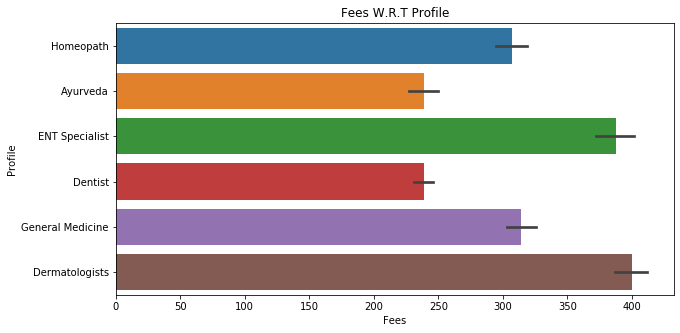

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(doc_df['Fees'],doc_df['Profile'])
plt.title('Fees W.R.T Profile')

Text(0.5, 1.0, 'Fees W.R.T Place_2')

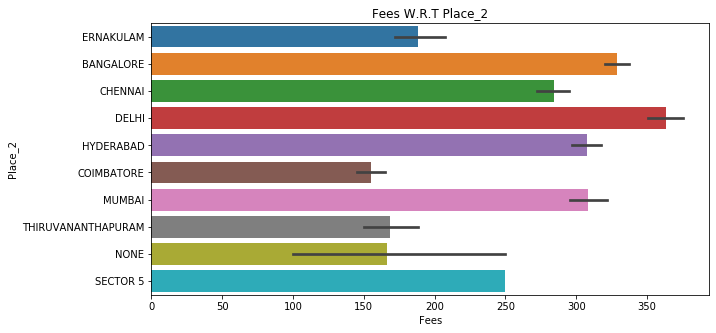

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(doc_df['Fees'],doc_df['Place_2'])
plt.title('Fees W.R.T Place_2')

In [52]:
plt.figure(figsize=(100,250))
sns.barplot(doc_df['Fees'],doc_df['Place_1'])
plt.title('Fees W.R.T Place_1')359220077030733

Text(0.5, 1.0, 'Fees W.R.T Place_1')

Text(0.5, 1.0, 'Fees W.R.T qualification_1')

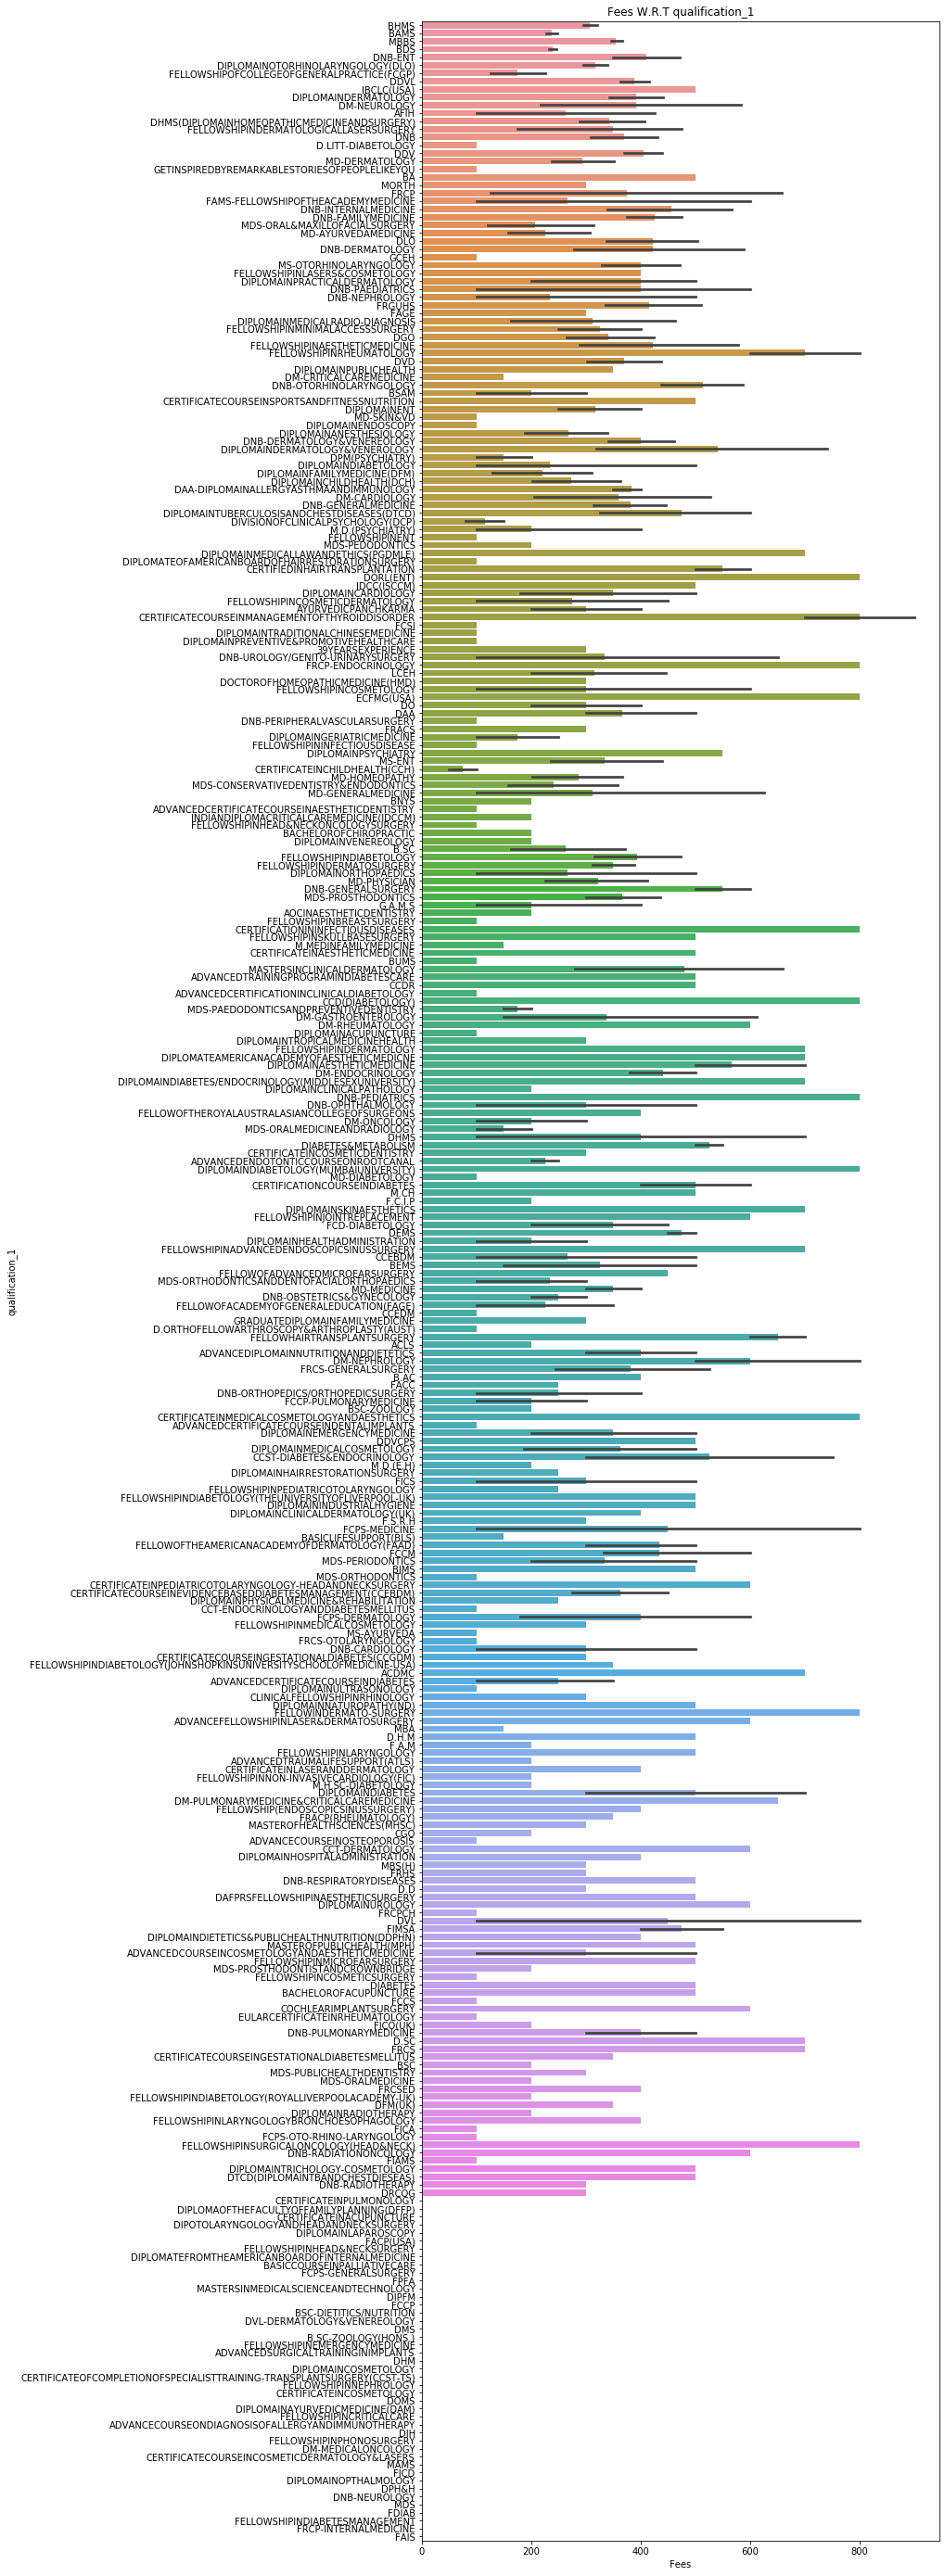

In [53]:
plt.figure(figsize=(10,50))
sns.barplot(doc_df['Fees'],doc_df['qualification_1'])
plt.title('Fees W.R.T qualification_1')

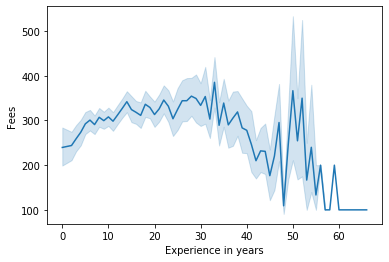

In [54]:
sns.lineplot(doc_df['Experience in years'],doc_df['Fees'])

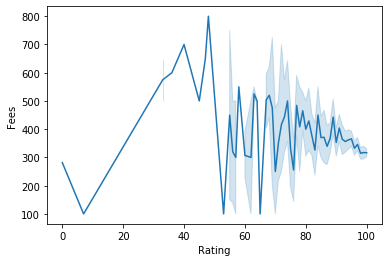

In [55]:
sns.lineplot(doc_df['Rating'],doc_df['Fees'])

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [56]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [57]:
columns=(lb.fit_transform(doc_df['Profile']),lb.fit_transform(doc_df['qualification_1']),lb.fit_transform(doc_df['qualification_2']),
        lb.fit_transform(doc_df['Place_1']),lb.fit_transform(doc_df['Place_2']))

In [58]:
doc_df['Profile']=columns[0]
doc_df['qualification_1']=columns[1]
doc_df['qualification_2']=columns[2]
doc_df['Place_1']=columns[3]
doc_df['Place_2']=columns[4]

In [59]:
doc_df.head()

,Experience in years,Rating,Profile,Fees,source,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,5,100.0,train,30,389,321,4
1,12,98.0,0,350.0,train,25,373,927,0
2,9,0.0,3,300.0,train,288,480,492,0
3,12,0.0,0,250.0,train,25,14,70,0
4,20,100.0,0,250.0,train,25,491,364,1


# Univariate Analysis

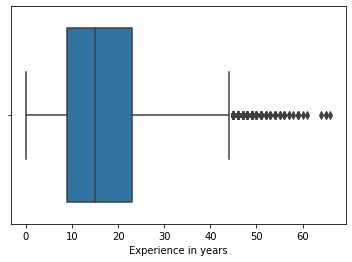

In [60]:
sns.boxplot(doc_df['Experience in years'])

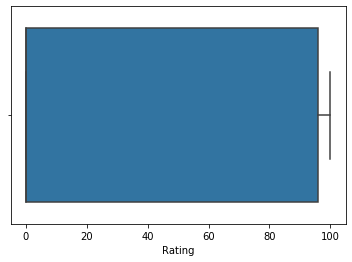

In [61]:
sns.boxplot(doc_df['Rating'])

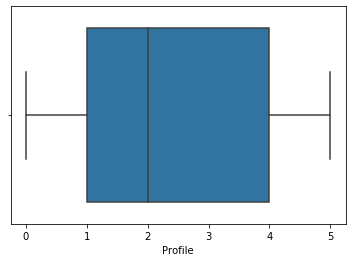

In [62]:
sns.boxplot(doc_df['Profile'])

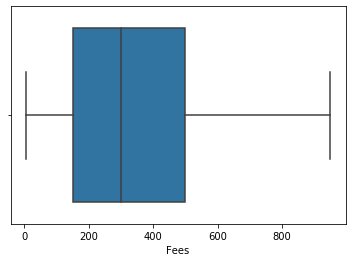

In [63]:
sns.boxplot(doc_df['Fees'])

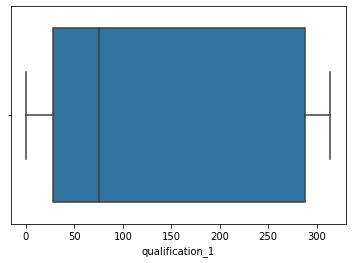

In [64]:
sns.boxplot(doc_df['qualification_1'])

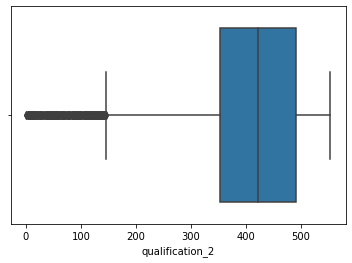

In [65]:
sns.boxplot(doc_df['qualification_2'])

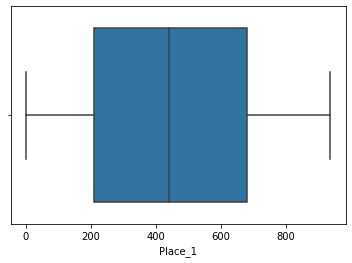

In [66]:
sns.boxplot(doc_df['Place_1'])

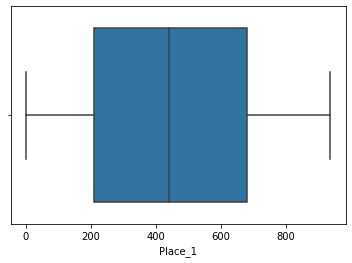

In [67]:
sns.boxplot(doc_df['Place_1'])

# Statistical Analysis

In [68]:
doc_df.describe()

,Experience in years,Rating,Profile,Fees,qualification_1,qualification_2,Place_1,Place_2
count,7897.000000,7897.000000,7897.000000,5921.000000,7897.000000,7897.000000,7897.000000,7897.000000
mean,17.521844,42.594783,2.460428,309.121432,125.533367,399.468912,448.401038,3.076105
std,11.166106,47.353886,1.658613,190.833707,113.526213,111.673722,277.381683,2.343297
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,28.000000,353.000000,210.000000,1.000000
50%,15.000000,0.000000,2.000000,300.000000,75.000000,423.000000,442.000000,3.000000
75%,23.000000,96.000000,4.000000,500.000000,288.000000,491.000000,680.000000,5.000000
max,66.000000,100.000000,5.000000,950.000000,314.000000,554.000000,937.000000,9.000000


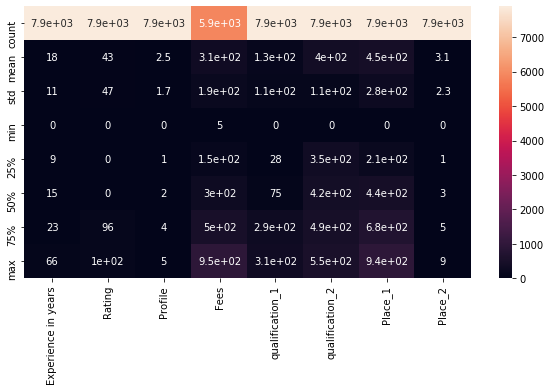

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_df.describe(),annot=True)

In [70]:
doc_cor=doc_df.corr()

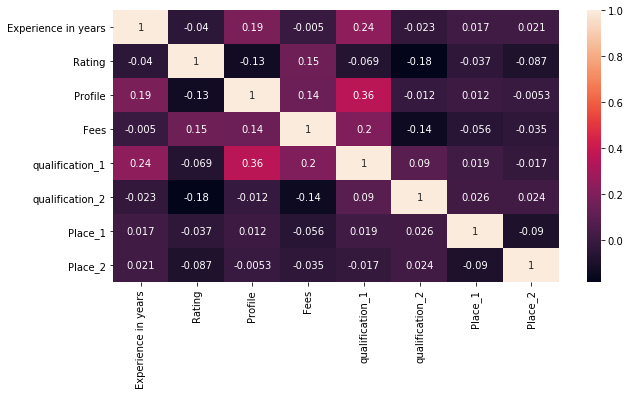

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_cor,annot=True)

In [72]:
doc_cov=doc_df.cov()

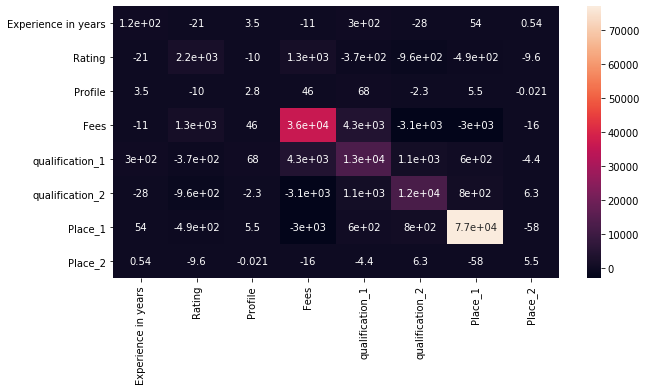

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_cov,annot=True)

In [74]:
#checking the skewness
doc_df.skew()

Experience in years    0.993071
Rating                 0.230069
Profile                0.085763
Fees                   0.746366
qualification_1        0.560618
qualification_2       -1.595926
Place_1                0.096146
Place_2                0.112160
dtype: float64

In [75]:
#explitting test and train data
doc_train_df = doc_df[doc_df.source=="train"]
doc_test_df = doc_df[doc_df.source=="test"]

In [76]:
#cheking the final shape of the test data
doc_test_df.shape

(1976, 9)

In [77]:
doc_test_df.head()

,Experience in years,Rating,Profile,Fees,source,qualification_1,qualification_2,Place_1,Place_2
0,35,0.0,4,NaN,test,288,491,217,6
1,31,0.0,3,NaN,test,120,353,925,5
2,40,70.0,2,NaN,test,77,353,384,1
3,0,0.0,0,NaN,test,25,491,575,3
4,16,100.0,1,NaN,test,28,423,337,0


In [78]:
#dropping 'fees' and 'source' column
doc_test_df.drop(['Fees','source'],axis=1,inplace=True)

In [79]:
doc_test_df.head()

,Experience in years,Rating,Profile,qualification_1,qualification_2,Place_1,Place_2
0,35,0.0,4,288,491,217,6
1,31,0.0,3,120,353,925,5
2,40,70.0,2,77,353,384,1
3,0,0.0,0,25,491,575,3
4,16,100.0,1,28,423,337,0


In [80]:
#cheking the final shape of the train data
doc_train_df.shape

(5921, 9)

In [81]:
doc_train_df.head()

,Experience in years,Rating,Profile,Fees,source,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,5,100.0,train,30,389,321,4
1,12,98.0,0,350.0,train,25,373,927,0
2,9,0.0,3,300.0,train,288,480,492,0
3,12,0.0,0,250.0,train,25,14,70,0
4,20,100.0,0,250.0,train,25,491,364,1


In [82]:
#dropping source
doc_train_df.drop(['source'],axis=1,inplace=True)

In [83]:
doc_train_df.head()

,Experience in years,Rating,Profile,Fees,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,5,100.0,30,389,321,4
1,12,98.0,0,350.0,25,373,927,0
2,9,0.0,3,300.0,288,480,492,0
3,12,0.0,0,250.0,25,14,70,0
4,20,100.0,0,250.0,25,491,364,1


# Removing The outliers and Skewness

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(doc_train_df))
print(z)

[[0.5961429  1.21382723 1.53964191 ... 0.1039701  0.4602274  0.38741665]
 [0.4849481  1.17160536 1.47259036 ... 0.24761471 1.72880553 1.31019224]
 [0.75522085 0.89726656 0.334749   ... 0.71300863 0.15747001 1.31019224]
 ...
 [2.12768848 1.15049442 0.93719545 ... 0.8117643  0.77810677 0.03698557]
 [0.21467535 1.00271785 0.93719545 ... 0.13090346 1.66378475 1.2362211 ]
 [0.03449352 1.21382723 0.87014391 ... 0.31798595 0.73182024 0.03698557]]


In [85]:
threhold=3

In [86]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([   3,    9,   70,   94,  105,  110,  151,  183,  229,  248,  255,
        274,  275,  293,  325,  357,  372,  434,  447,  486,  609,  620,
        683,  694,  733,  757,  802,  823,  833,  896,  938,  975,  982,
        995, 1002, 1003, 1056, 1104, 1123, 1129, 1170, 1177, 1192, 1196,
       1197, 1281, 1306, 1309, 1310, 1387, 1395, 1442, 1447, 1452, 1484,
       1539, 1548, 1562, 1585, 1601, 1612, 1623, 1649, 1665, 1706, 1708,
       1718, 1787, 1817, 1852, 1898, 1949, 1973, 2015, 2027, 2053, 2054,
       2156, 2192, 2217, 2230, 2238, 2242, 2251, 2252, 2271, 2293, 2339,
       2357, 2358, 2382, 2417, 2438, 2471, 2506, 2510, 2524, 2608, 2610,
       2611, 2617, 2619, 2639, 2696, 2713, 2723, 2756, 2768, 2818, 2838,
       2880, 2952, 2955, 2968, 2976, 2978, 3054, 3079, 3091, 3165, 3167,
       3170, 3180, 3223, 3240, 3267, 3269, 3347, 3351, 3357, 3373, 3375,
       3400, 3450, 3457, 3462, 3474, 3477, 3527, 3545, 3561, 3563, 3590,
       3614, 3662, 3688, 3737, 3812, 3854, 3906, 3

In [87]:
z[3][5]#checking the above output result

3.470640676240364

In [88]:
z[9][5]#checking the above output result

3.4796184644545938

In [89]:
doc_new=doc_train_df[(z<3).all(axis=1)]  #removing outliers

In [90]:
print("Shape of the dataset before removing outliers",doc_train_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",doc_new.shape)

Shape of the dataset before removing outliers (5921, 8)

 

Shape of the dataset after removing the outliers (5696, 8)


In [91]:
#we are left with only 5696 rows in the dataset

In [92]:
#cheking skewness after removing outliers
doc_new.skew()

Experience in years    0.895633
Rating                 0.254101
Profile                0.090698
Fees                   0.691779
qualification_1        0.530467
qualification_2       -1.412621
Place_1                0.090182
Place_2                0.123325
dtype: float64

In [93]:
#removing the Skewness
collist=doc_new.columns.values
for i in range(0,len(collist)):
    if doc_new.skew().loc[collist[i]]>0.55:
        doc_new[collist[i]]=np.sqrt(doc_new[collist[i]])

In [94]:
doc_new.skew()

Experience in years    0.094425
Rating                 0.254101
Profile                0.090698
Fees                   0.202740
qualification_1        0.530467
qualification_2       -1.412621
Place_1                0.090182
Place_2                0.123325
dtype: float64

In [95]:
#seprating data as x and y
y=doc_new['Fees']

In [96]:
y.shape

(5696,)

In [97]:
y.head()

0    10.000000
1    18.708287
2    17.320508
4    15.811388
5    10.000000
Name: Fees, dtype: float64

In [98]:
doc_new.drop(['Fees'],axis=1,inplace=True)

In [99]:
x=doc_new.iloc[:,:]

In [100]:
x.shape

(5696, 7)

In [101]:
x.head()

,Experience in years,Rating,Profile,qualification_1,qualification_2,Place_1,Place_2
0,4.898979,100.0,5,30,389,321,4
1,3.464102,98.0,0,25,373,927,0
2,3.000000,0.0,3,288,480,492,0
4,4.472136,100.0,0,25,491,364,1
5,2.828427,0.0,0,25,491,660,1


In [102]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [103]:
x=df_x
print(x)

[[ 0.73566667  1.22630621  1.53708084 ... -0.23653587 -0.46204913
   0.39094794]
 [-0.35658219  1.18400109 -1.48821718 ... -0.40724464  1.73115314
  -1.30892953]
 [-0.70986276 -0.88894964  0.32696163 ...  0.73437026  0.15682477
  -1.30892953]
 ...
 [ 1.88064245  1.16284853  0.93202124 ...  0.85173254 -0.78053395
  -0.03402142]
 [-0.04533577  1.01478062  0.93202124 ... -0.26854376  1.66600852
   1.24088668]
 [ 0.14506077  1.22630621 -0.88315757 ...  0.26492114  0.73226894
  -0.03402142]]


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [105]:
lm=LinearRegression() 
lm.fit(x,y)
print(lm.score(x,y))
pred=lm.predict(doc_test_df)
r_score=r2_score(y_test,pred)
print("R2 SCORE is equal to :",r_score,"at random state") 

0.11532291559931974
R2 SCORE is equal to : -42.68549599722196 at random state


In [106]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [107]:
from sklearn.linear_model import Lasso,Ridge

In [108]:
ls=Lasso(alpha=0.0001)
ls.fit(x,y)
print(ls.score(x,y))
print("\n")
preed=ls.predict(doc_test_df)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.1153229131311273


The R2 score is -42.68291843884441


In [109]:
ri=Ridge(alpha=0.001)
ri.fit(x,y)
print(ri.score(x,y))
print("\n")
predd=ri.predict(doc_test_df)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.11532291559931683


The r2_score is -42.68549388942495


In [110]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x,y)
enrpred=enr.predict(doc_test_df)
print(enr.score(x,y))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.05977416585121808
The r2_score is -33.20029104321458


array([-0.        ,  0.2369383 ,  0.08947352,  0.35883736, -0.36163632,
       -0.        , -0.        ])

In [111]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
gd.best_params_

{'criterion': 'mse'}

In [112]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
gd.best_params_

{'n_neighbors': 9}

In [113]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
gd.best_params_

{'kernel': 'rbf'}

In [114]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(criterion='mse'),KNeighborsRegressor(n_neighbors=9)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x,y)
    print(models)
    prediction=models.predict(doc_test_df)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = -42.68549599722196




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = -30.422321144793283




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = -30.578967282076718




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')


R2_SCORE = -30.34545123008612




In [115]:
#SVR is giving Good result hence finalizing it

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x,y)
print(gbr.score(x,y))
gbrpred=gbr.predict(doc_test_df)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.5614071612550942
R2 Score = -262444.02641166345


In [117]:
svr=SVR(kernel='rbf')
svr.fit(x,y)
prediction=svr.predict(doc_test_df)
R2_score=r2_score(prediction,y_test)
print("R2 Score =", R2_score)

R2 Score = 0.0


In [118]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,gbrpred))
print("Mean squared error:",mean_absolute_error(y_test,gbrpred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,gbrpred)))

ERROR
MEan Absolute error: 1922.6317913031935
Mean squared error: 1922.6317913031935
Root mean squared error: 1954.4654456858336


In [119]:
from sklearn.externals import joblib
joblib.dump(gbr,"gbr_Doctor_Price.pkl")

['gbr_Doctor_Price.pkl']